In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [2]:
data= datasets.load_digits()

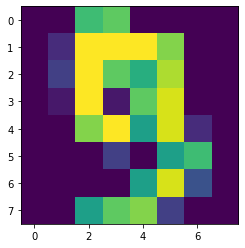

label: 9


In [37]:
plt.imshow(data.images[9])
plt.show()
print('label:', data.target[9])

In [38]:
whole_data = load_digits()
X_data = whole_data.images
y_data = whole_data.target

In [39]:
X_data = data.images
y_data = data.target
print(X_data.shape)
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [40]:
X_data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [41]:
y_data

array([0, 1, 2, ..., 8, 9, 8])

In [42]:
y_data = to_categorical(y_data)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)
X_check = X_test

In [44]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [45]:
from keras import Sequential 
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

In [48]:
model.add(Activation('relu'))


In [49]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [50]:
model.add(Flatten())

In [51]:
model.add(Dense(50, activation = 'relu'))


In [52]:
model.add(Dense(10, activation = 'softmax'))

In [53]:
import tensorflow as tf

In [54]:
adam =tf.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy',optimizer = adam, metrics = ['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 10)          100       
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 10)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                4550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
____________________________________________________

In [56]:
hitory = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1)

Epoch 1/100
21/21 [==============================] - 1s 21ms/step - loss: 2.5637 - accuracy: 0.2448 - val_loss: 1.6193 - val_accuracy: 0.3849
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 1.4076 - accuracy: 0.5214 - val_loss: 0.9729 - val_accuracy: 0.7460
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.8763 - accuracy: 0.7682 - val_loss: 0.5974 - val_accuracy: 0.8611
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6018 - accuracy: 0.8428 - val_loss: 0.3989 - val_accuracy: 0.9087
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4413 - accuracy: 0.8925 - val_loss: 0.2963 - val_accuracy: 0.9286
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3458 - accuracy: 0.9124 - val_loss: 0.2381 - val_accuracy: 0.9405
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.2764 - accuracy: 0.9264 - val_loss: 0.1968 - val_accuracy: 0.9683
Epoch 8/100


In [57]:
results= model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.9778


In [59]:
print('Test accuracy:', results[1])

Test accuracy: 0.9777777791023254


In [62]:
results = model.predict(X_test)

In [63]:
results[0]

array([3.9515163e-07, 3.4778749e-09, 1.2925588e-09, 9.6861470e-08,
       2.1363539e-07, 9.9998128e-01, 2.4892222e-06, 2.2801436e-07,
       1.4488279e-07, 1.5121983e-05], dtype=float32)

In [64]:
X_test.shape

(540, 8, 8, 1)

In [65]:
predict_class = np.argmax(results, axis= 1)

In [66]:
predict_class

array([5, 6, 6, 2, 4, 1, 7, 3, 4, 3, 4, 7, 4, 2, 2, 6, 3, 7, 1, 2, 3, 2,
       0, 2, 6, 1, 9, 7, 7, 8, 4, 5, 2, 3, 7, 5, 9, 8, 7, 8, 7, 1, 1, 4,
       7, 1, 2, 5, 8, 6, 8, 5, 0, 7, 4, 6, 3, 1, 7, 6, 6, 6, 4, 6, 7, 0,
       9, 2, 7, 5, 1, 5, 5, 9, 4, 2, 4, 4, 0, 7, 3, 8, 0, 8, 6, 6, 3, 9,
       9, 3, 6, 1, 0, 9, 8, 8, 4, 0, 3, 9, 7, 4, 9, 8, 1, 0, 7, 6, 0, 8,
       5, 1, 5, 5, 9, 7, 2, 6, 1, 0, 2, 1, 0, 8, 0, 7, 9, 3, 8, 1, 0, 1,
       4, 9, 3, 4, 7, 5, 6, 4, 7, 5, 9, 5, 3, 7, 8, 8, 3, 2, 7, 5, 8, 5,
       0, 5, 4, 6, 3, 1, 9, 4, 5, 8, 8, 6, 9, 3, 7, 7, 6, 1, 6, 9, 6, 5,
       7, 1, 1, 0, 2, 1, 3, 0, 1, 4, 1, 0, 6, 8, 9, 8, 8, 4, 7, 6, 0, 8,
       8, 6, 8, 5, 5, 5, 7, 0, 3, 1, 9, 0, 3, 5, 2, 8, 0, 9, 0, 1, 9, 6,
       1, 0, 0, 8, 0, 6, 7, 5, 5, 1, 1, 5, 7, 3, 7, 8, 0, 0, 6, 8, 2, 6,
       2, 2, 9, 9, 0, 8, 4, 7, 1, 3, 0, 1, 9, 2, 1, 1, 0, 8, 8, 7, 3, 1,
       5, 4, 0, 3, 5, 2, 2, 7, 7, 5, 9, 8, 9, 2, 5, 4, 4, 2, 3, 0, 8, 1,
       5, 1, 2, 0, 5, 6, 3, 8, 9, 2, 8, 4, 5, 4, 7,